# Cálculo Numérico - 2021.2 - Tarefa 4 - Professor João Paixão
## Realizado por: David Rodrigues Albuquerque - 120047390
## Questões discutidas com: Beatriz Almeida Ramos, Carlos Bravo, Matheus Barroso

# Exercício 1.1.2

Para este exercício, utilizaremos a técnica do Método de Newton para calcular uma aproximação de ln(3) utilizando 20 passos do método.

Para isto, queremos uma função $f(x)$ tal que $f(ln(3)) = 0$. Como sabemos calcular $e^{x}$ para qualquer $x$ e sabemos as propriedades de $ln$, podemos utilizar a função $f(x) = 3 - e^{x}$.

Com isto, temos que

$$f(x) = 3 - e^{x}$$
$$f'(x) = -e^x$$

Assim, podemos utilizar o Método de Newton na forma

$$x = x_{init} - \dfrac{f(x_{init})}{f'(x_{init})} = x_{init} - \dfrac{3-e^{x_{init}}}{-e^{x_{init}}}$$

tal que $x$ é o número que queremos aproximar e $x_{init}$ é um chute inicial.

Com isto, podemos utilizar o algoritmo abaixo para realizar a aproximação.

In [3]:
# Exemplo de Metodo de Newton para achar ln(3)
function newton_ln_3(iteracoes, chute) # Número de iterações e chute inicial
    for i=1:iteracoes
        chute = chute - (3-(Base.MathConstants.e^chute))/(-Base.MathConstants.e^chute) # Chute - f(chute)/f'(chute)
    end
    return chute # Aproximação do resultado. Quanto mais iterações, maior a precisão.
end

newton_ln_3 (generic function with 1 method)

Passaremos então para função um número de passos $20$ e uma aproximação inicial $1$

In [4]:
newton_ln_3(20, 1)

1.0986122886681096

# Exercício 1.1.4



Para este exercício, utilizaremos a técnica da Interpolação Polinomial de Grau 1 para calcular uma aproximação de ln(3) e estimaremos o erro máximo. Utilizaremos então um conjunto de pontos afim de montar o sistema de equações que resultará na matriz de Vandermonde para encontrarmos uma função aproximada que nos dará o valor de ln(3).

Podemos tirar uma aproximação da função logaritmica próxima de um polinômio de grau 1 utilizando valores triviais, isto é, $ln(1)$ e $ln(e)$, pois podem ser calculados usando apenas as propriedades de logaritmo. Com isto, teremos uma função que passa pelos pontos $(x_{1},y_{1}),(x_{2},y_{2})$ e que nos dará um polinômio na forma 
$$P = c_{1}x + c_{0}$$

$$
\begin{cases}
c_{1}x_{0} + c_{0} = y_{0} \\
c_{1}x_{1} + c_{0} = y_{1} \\
\end{cases}
$$

Usaremos então os pontos $(ln(1), 0),(ln(e),1)$. Portanto, temos que 

\begin{cases}
c_{1}ln(1) + c_{0} = 0 \\
c_{1}ln(e) + c_{0} = 1 \\
\end{cases}

Com isto, podemos modelar as matrizes da seguinte forma


$$
V = \begin{bmatrix}
1 & ln(1)  \\
1 & ln(e)  \\
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
0 \\
1 \\
\end{bmatrix}
$$

$$
C = \begin{bmatrix}
c_{0} \\
c_{1} \\
\end{bmatrix}
$$

Devemos então resolver o sistema tal que $V \cdot c = y$. Vamos então utilizar o método interpolacao_ln3_grau1 descrito abaixo para resolver o sistema, retornando os coeficientes do polinômio de grau 1.

In [5]:
function interpolacao_ln3_grau1()
    # Cria a matriz V
    x = [log(1);log(Base.MathConstants.e)]
    y = [0; 1]
    V=[x.^0 x.^1]
    c=V\y # Resolve o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolacao_ln3_grau1 (generic function with 1 method)

Com isto, podemos utilizar o método para achar os coeficientes da polinômio de grau 1 que nos dá uma aproximação da função original. Podemos então armazenar esses coeficientes, montar a função afim e calcular uma aproximação de ln(3) a partir desta função.

In [6]:
coefs = interpolacao_ln3_grau1()
c1 = coefs[2]
c0 = coefs[1]
f(x) = c1*x + c0
f(log(3))

1.0986122886681098

# Exercício 1.1.5



Para este exercício, utilizaremos a técnica da Interpolação Polinomial de Grau 2 para calcular uma aproximação de ln(3) e estimaremos o erro máximo. Utilizaremos então um conjunto de pontos afim de montar o sistema de equações que resultará na matriz de Vandermonde para encontrarmos uma função aproximada que nos dará o valor de ln(3).

Podemos tirar uma aproximação da função logaritmica próxima de um polinômio de grau 2 utilizando valores triviais, isto é, $ln(1)$, $ln(e)$ e $ln(e^{2})$ pois podem ser calculados usando apenas as propriedades de logaritmo. Com isto, teremos uma função que passa pelos pontos $(x_{1},y_{1}),(x_{2},y_{2}), (x_{3},y_{3})$ e que nos dará um polinômio na forma 

$$P = c_{2}x^2 + c_{1}x + c_{0}$$

$$
\begin{cases}
c_{2}x_{0}^2 + c_{1}x_{0} + c_{0} = y_{0} \\
c_{2}x_{1}^2 + c_{1}x_{1} + c_{0} = y_{1} \\
c_{2}x_{2}^2 + c_{1}x_{2} + c_{0} = y_{2} \\
\end{cases}
$$

Usaremos então os pontos $(ln(1), 0),(ln(e),1)$ e $(ln(e^2), 2)$. Portanto, temos que 

\begin{cases}
c_{2}ln(1)^2 + c_{1}ln(1) + c_{0} = 0 \\
c_{2}ln(e)^2 + c_{1}ln(e) + c_{0} = 1 \\
c_{2}ln(e^2)^2 + c_{1}ln(e^2) + c_{0} = 2 \\
\end{cases}

Com isto, podemos modelar as matrizes da seguinte forma


$$
V = \begin{bmatrix}
1 & ln(1) & ln(1)^2  \\
1 & ln(e) & ln(e)^2 \\
1 & ln(e^2) & ln(e^2)^2 \\
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
0 \\
1 \\
2 \\
\end{bmatrix}
$$

$$
C = \begin{bmatrix}
c_{0} \\
c_{1} \\
c_{2} \\
\end{bmatrix}
$$

Devemos então resolver o sistema tal que $V \cdot c = y$. Vamos então utilizar o método interpolacao_ln3_grau2 descrito abaixo para resolver o sistema, retornando os coeficientes do polinômio de grau 2.

In [7]:
function interpolacao_ln3_grau2()
    # Cria a matriz V
    x = [log(1);log(Base.MathConstants.e); log((Base.MathConstants.e)^2)]
    y = [0; 1; 2]
    V=[x.^0 x.^1 x.^2]
    c=V\y # Resolve o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolacao_ln3_grau2 (generic function with 1 method)

Com isto, podemos utilizar o método para achar os coeficientes da polinômio de grau 2 que nos dá uma aproximação da função original. Podemos então armazenar esses coeficientes, montar a função quadrática e calcular uma aproximação de ln(3) a partir desta função.

In [8]:
coefs = interpolacao_ln3_grau2()
c2 = coefs[3]
c1 = coefs[2]
c0 = coefs[1]
f(x) = c2*x^2 + c1*x + c0
f(log(3))

1.0986122886681098

# Exercício 1.2)

Para este exercício, iremos gerar aleatoriamente 30 pontos em um polinômio de grau 5. Após isto, faremos a regressão polinomial com polinômios de grau 0 até 29. Faremos então a análise do caso e para polinômios de grau maior que 29. No final de tudo, plotaremos o erro total por grau.



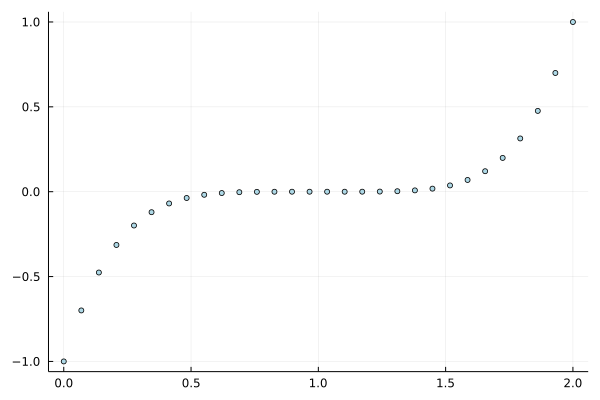

In [20]:
using Plots
using Random
using LinearAlgebra

Random.seed!(0)
# Gerando dados fictícios para teste
n = 30
x = range(0, 2, length=n)

f(x) = (x-1)^5

y = f.(x) #ruído
scatter(x, y, c=:lightblue, ms=3, leg=false)

Após, podemos utilizar a função vandermon abaixo para montar a matriz de Vandermon necessária para realizar o cálculo a depender do grau da função.


In [10]:
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

Com isto, podemos aplicar a regressão para resolver o sistema e nos dar uma aproximação da função variando do grau $0$ até $29$.

In [11]:
function regressao(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #mínimos quadrados
    return c, grau
end

regressao (generic function with 1 method)

Criaremos também a função plota_regressao para plotar todas as aproxima

In [12]:
using Polynomials
using Plots

In [13]:
function plota_regressao(regressao, grau)
    coefs = Float64[]
    p = Any[]
    for i=1:grau+1 #linhas
        push!(coefs, regressao[i])
        p = Polynomial(coefs)
    end
    return p
end

plota_regressao (generic function with 1 method)

Com isto, podemos plotar uma aproximação da função em qualquer grau.

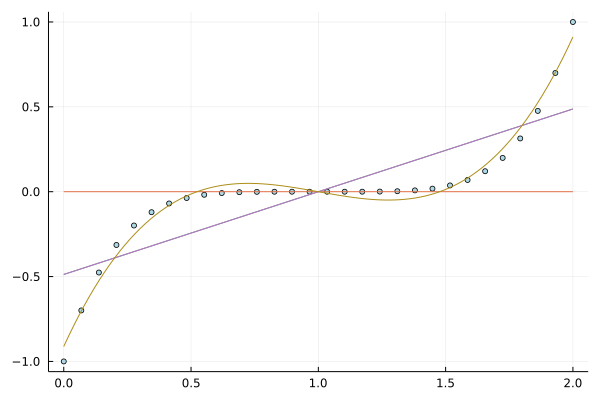

In [14]:
c, grau = regressao(x,y,0)
p0 = plota_regressao(c, 0)

c, grau = regressao(x,y,1)
p1 = plota_regressao(c, 1)

c, grau = regressao(x,y,2)
p2 = plota_regressao(c, 2)

c, grau = regressao(x,y,3)
p3 = plota_regressao(c, 3)


scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(p0, 0, 2)
plot!(p1, 0, 2)
plot!(p2, 0, 2)
plot!(p3, 0, 2)

Com isto, podemos fazer o experimento de fazer uma regressão de grau maior que 29.

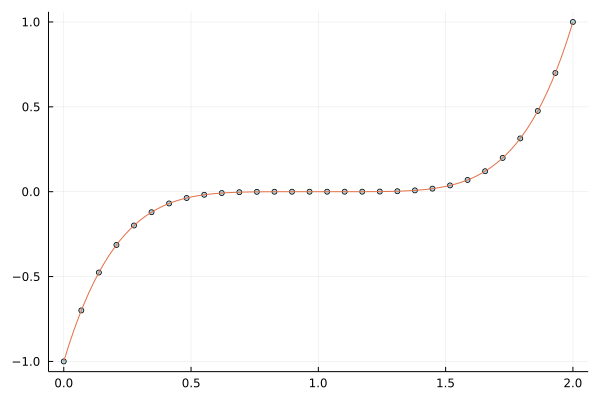

In [15]:
c, grau = regressao(x,y,29)
p29 = plota_regressao(c, 29)

scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(p29, 0, 2)

Podemos então, por fim, utilizar a função erro_total e erro_modelos para plotar o gráfico do erro total da função por grau

In [16]:
function erro_total(x,y,modelo)
    n,=size(y)
    S=0
    for i=1:n
        S=S+(y[i]-modelo(x[i]))^2
    end
    return sqrt(S)  
end

erro_total (generic function with 1 method)

In [17]:
function erro_modelos(grau, modelos)
    erros = Any[]
    for i=0:grau
        push!(erros, erro_total(x,y,modelos[i+1]))
    end
    return erros
end

erro_modelos (generic function with 1 method)

In [18]:
modelos = []
for i=0:29
    c, grau = regressao(x,y,i)
    pn = plota_regressao(c, i)
    push!(modelos, pn)
end

y = erro_modelos(29, modelos)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

scatter(x, y)

# Exercício 1.3)

# Exercício 1.4)

# Exercício 1.5)



# Exercício 1.6)

# Exercício 1.7)

